# pandas


Пакет для статистической обработки данных, по функциональности близкий к R.

In [2]:
import numpy as np
import pandas as pd

## Series

Одномерный набор данных. Отсутствующий данные записываются как `np.nan` (в этот день термометр сломался или метеоролог был пьян); они не участвуют в вычислении средних, среднеквадратичных отклонений и т.д.

In [4]:
l=[1,3,5,np.nan,6,8]
s=pd.Series(l)
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


Основная информация о наборе данных: среднее, среднеквадратичное отклонение, минимум, максимум, медиана (которая отличается от среднего для несимметричных распределений).

In [5]:
s.describe()

count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64

Обычная индексация.

In [6]:
s[2]

5.0

In [7]:
s[2]=7
s

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [8]:
s[2:5]

2    7.0
3    NaN
4    6.0
dtype: float64

In [9]:
s1=s[1:]
s1

1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [10]:
s2=s[:-1]
s2

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
dtype: float64


В сумме `s1+s2` складываются данные с одинаковыми индексами. Поскольку в `s1` нет данного и индексом 0, а в `s2` - с индексом 5, в `s1+s2` в соответствующих позициях будет `NaN`.

In [11]:
s1+s2

0     NaN
1     6.0
2    14.0
3     NaN
4    12.0
5     NaN
dtype: float64


К наборам данных можно применять функции из `numpy`.

In [12]:
np.exp(s)

0       2.718282
1      20.085537
2    1096.633158
3            NaN
4     403.428793
5    2980.957987
dtype: float64

При создании набора данных s мы не указали, что будет играть роль индекса. По умолчанию это последовательность целых чисел 0, 1, 2, ...

In [13]:
s.index

RangeIndex(start=0, stop=6, step=1)


Но можно создавать наборы данных с индексом, заданным списком.

In [14]:
i=list('abcdef')
i

['a', 'b', 'c', 'd', 'e', 'f']

In [15]:
s=pd.Series(l,index=i)
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

In [16]:
s['c']

5.0

Если индекс - строка, то вместо s['c'] можно писать s.c.

In [17]:
s.c

5.0

Набор данных можно создать из словаря.

In [18]:
s=pd.Series({'a':1,'b':2,'c':0})
s

a    1
b    2
c    0
dtype: int64


Можно отсортировать набор данных.

In [19]:
s.sort_values()

c    0
a    1
b    2
dtype: int64

Роль индекса может играть, скажем, последовательность дат (или времён измерения и т.д.).

In [20]:
d=pd.date_range('20160101',periods=10)
d

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [21]:
s=pd.Series(np.random.normal(size=10),index=d)
s

2016-01-01   -0.045439
2016-01-02   -0.353641
2016-01-03   -0.132160
2016-01-04    2.342001
2016-01-05   -1.409002
2016-01-06    0.216211
2016-01-07    0.829831
2016-01-08    0.868123
2016-01-09    1.056593
2016-01-10    0.346978
Freq: D, dtype: float64

Операции сравнения возвращают наборы булевых данных.

In [22]:
s>0

2016-01-01    False
2016-01-02    False
2016-01-03    False
2016-01-04     True
2016-01-05    False
2016-01-06     True
2016-01-07     True
2016-01-08     True
2016-01-09     True
2016-01-10     True
Freq: D, dtype: bool

Если такой булев набор использовать для индексации, получится поднабор только из тех данных, для которых условие есть True.

In [23]:
s[s>0]

2016-01-04    2.342001
2016-01-06    0.216211
2016-01-07    0.829831
2016-01-08    0.868123
2016-01-09    1.056593
2016-01-10    0.346978
dtype: float64

**Задание:** Вам дан массив из 1000 чисел. Оставьте в нем только те числа, которые делятся на 29, а их последняя цифра равна 3.

In [24]:
s = pd.Series(np.arange(1000))

# ответ

In [26]:
a = s%29 == 0
b = s%10 ==3
c = a & b
s[c]

203    203
493    493
783    783
dtype: int64

# Кумулятивные максимумы - от первого элемента до текущего.

In [27]:
s.cummax()

0        0
1        1
2        2
3        3
4        4
      ... 
995    995
996    996
997    997
998    998
999    999
Length: 1000, dtype: int64


Кумулятивные суммы.

In [28]:
s=s.cumsum()
s

0           0
1           1
2           3
3           6
4          10
        ...  
995    495510
996    496506
997    497503
998    498501
999    499500
Length: 1000, dtype: int64


Построим график.

In [32]:
import matplotlib.pyplot as plt


In [33]:
s = pd.Series(np.arange(1000))
s=s.cumsum()

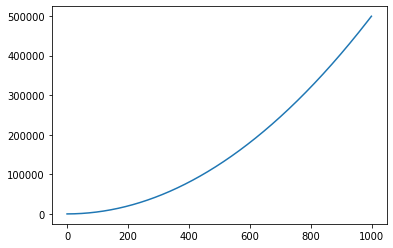

In [34]:
plt.plot(s)

## DataFrame

Двумерная таблица данных. Имеет индекс и набор столбцов (возможно, имеющих разные типы). Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [35]:
d={'one':pd.Series([1,2,3],index=['a','b','c']),
   'two':pd.Series([1,2,3,4],index=['a','b','c','d'])}
df=pd.DataFrame(d)
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [36]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [37]:
df.columns

Index(['one', 'two'], dtype='object')

Если в качестве индекса указать имя столбца, получится одномерный набор данных.

In [38]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [39]:
df.one

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [40]:
df['one']['c']

3.0


Однако если указать диапазон индексов, то это означает диапазон строк. Причём последняя строка включается в таблицу.

In [41]:
df['b':'d']

,one,two
b,2.0,2
c,3.0,3
d,NaN,4



Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным.

In [42]:
df[1:3]

,one,two
b,2.0,2
c,3.0,3



Логичнее работает атрибут `loc`: первая позиция - всегда индекс строки, а вторая - столбца.

In [43]:
df.loc['b']

one    2.0
two    2.0
Name: b, dtype: float64

In [44]:
df.loc['b','one']

2.0

In [45]:
df.loc['a':'b','one']

a    1.0
b    2.0
Name: one, dtype: float64

In [46]:
df.loc['a':'b',:]

,one,two
a,1.0,1
b,2.0,2


In [47]:
df.loc[:,'one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

К таблице можно добавлять новые столбцы.

In [48]:
df['three']=df['one']*df['two']
df['flag']=df['two']>2
df

,one,two,three,flag
a,1.0,1,1.0,False
b,2.0,2,4.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,True


Также можно удалять имеющиеся.

In [49]:
#del df['two']
df['foo']=0.
# df.drop(['foo'], axis=1)
del df['foo']
df

,one,two,three,flag
a,1.0,1,1.0,False
b,2.0,2,4.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,True



Добавим копию столбца `one`, в которую входят только строки до второй.

In [50]:
df['one_tr']=df['one'][:2]
df

,one,two,three,flag,one_tr
a,1.0,1,1.0,False,1.0
b,2.0,2,4.0,False,2.0
c,3.0,3,9.0,True,NaN
d,NaN,4,NaN,True,NaN


In [51]:
df1=df.loc[:,['one','one_tr']]
df1

,one,one_tr
a,1.0,1.0
b,2.0,2.0
c,3.0,NaN
d,NaN,NaN


In [52]:
df1.loc['a', :] = 2
df

,one,two,three,flag,one_tr
a,1.0,1,1.0,False,1.0
b,2.0,2,4.0,False,2.0
c,3.0,3,9.0,True,NaN
d,NaN,4,NaN,True,NaN


Можно объединять таблицы по вертикали и по горизонтали.

In [53]:
df2=pd.DataFrame({'one':{'a':0,'b':1},'one_tr':{'b':2}})
df2

,one,one_tr
a,0,NaN
b,1,2.0


In [54]:
df3 = pd.concat([df,df2], axis=0)
df3

,one,two,three,flag,one_tr
a,1.0,1.0,1.0,False,1.0
b,2.0,2.0,4.0,False,2.0
c,3.0,3.0,9.0,True,NaN
d,NaN,4.0,NaN,True,NaN
a,0.0,NaN,NaN,NaN,NaN
b,1.0,NaN,NaN,NaN,2.0


In [55]:
df3.loc['a']

,one,two,three,flag,one_tr
a,1.0,1.0,1.0,False,1.0
a,0.0,NaN,NaN,NaN,NaN


In [56]:
df2=pd.DataFrame({'two':{'a':0,'b':1},'three':{'c':2,'d':3}})
df2

,two,three
a,0.0,NaN
b,1.0,NaN
c,NaN,2.0
d,NaN,3.0


In [57]:
pd.concat([df,df2],axis=1)

,one,two,three,flag,one_tr,two,three
a,1.0,1,1.0,False,1.0,0.0,NaN
b,2.0,2,4.0,False,2.0,1.0,NaN
c,3.0,3,9.0,True,NaN,NaN,2.0
d,NaN,4,NaN,True,NaN,NaN,3.0


Можно загрузить файл с расширением `.csv`:

In [58]:
path_to_file = 'https://gist.githubusercontent.com/bigsnarfdude/515849391ad37fe593997fe0db98afaa/raw/f663366d17b7d05de61a145bbce7b2b961b3b07f/weather.csv'
weather = pd.read_csv(path_to_file)

weather

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [59]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      14 non-null     object
 1   temperature  14 non-null     object
 2   humidity     14 non-null     object
 3   windy        14 non-null     bool  
 4   play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


**Задание:** создайте новую таблицу, в которой останутся только солнечные дни из предыдущей

In [60]:
df_new = weather[weather['outlook'] == 'sunny']
df_new

,outlook,temperature,humidity,windy,play
9,sunny,hot,high,False,no
10,sunny,hot,high,True,no
11,sunny,mild,high,False,no
12,sunny,cool,normal,False,yes
13,sunny,mild,normal,True,yes


# ответ

In [61]:
weather[weather.outlook == 'sunny']

,outlook,temperature,humidity,windy,play
9,sunny,hot,high,False,no
10,sunny,hot,high,True,no
11,sunny,mild,high,False,no
12,sunny,cool,normal,False,yes
13,sunny,mild,normal,True,yes


# **Задание:**
 посчитайте вероятность того, что погода будет ветренной, при условии, что:
1. Температура низкая
2. Температура средняя
3. Температура высокая

In [62]:
# YOUR CODE HERE

# ответ


In [64]:
d  = weather.windy==True
a = weather.temperature == 'cool'
b = weather.temperature == 'mild'
c = weather.temperature == 'hot'




print(len( weather[d & a])/len(weather[a]))

print(len( weather[d & b])/len(weather[b]))

print(len( weather[d & c])/len(weather[c]))

0.5
0.5
0.25



# Создадим таблицу из массива случайных чисел.

In [65]:
df=pd.DataFrame(np.random.randn(10,4),
                columns=['A','B','C','D'])
df

,A,B,C,D
0,-1.193392,-0.998210,-0.910331,-0.646515
1,2.616247,0.054321,-1.268539,-1.427663
2,-1.612475,-0.505299,0.974428,1.477461
3,-0.218403,0.043052,1.015244,1.657747
4,0.575840,0.295130,0.048443,-0.464624
5,1.057350,1.324732,0.921436,-1.291878
6,1.938584,-0.602851,0.877917,-0.535864
7,0.087931,-0.496821,-0.055641,-0.544830
8,-0.321149,0.724244,-0.113266,-0.874996
9,0.589142,0.794439,-0.989838,2.584363


In [66]:
df2=pd.DataFrame(np.random.randn(7,3),columns=['A','B','C'])
df+df2

,A,B,C,D
0,-0.368352,-0.879021,-1.885071,NaN
1,1.243018,0.178132,-0.786656,NaN
2,0.560158,-0.921156,2.056689,NaN
3,0.855240,-0.802991,0.525363,NaN
4,1.323882,1.310846,1.782414,NaN
5,-1.144900,0.969020,-0.165516,NaN
6,3.364037,-0.412587,1.088907,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [67]:
2*df+3

,A,B,C,D
0,0.613216,1.003580,1.179337,1.706971
1,8.232495,3.108642,0.462922,0.144675
2,-0.224951,1.989402,4.948856,5.954922
3,2.563194,3.086103,5.030488,6.315494
4,4.151680,3.590261,3.096885,2.070753
5,5.114700,5.649464,4.842872,0.416244
6,6.877168,1.794298,4.755834,1.928273
7,3.175861,2.006358,2.888718,1.910340
8,2.357702,4.448488,2.773469,1.250009
9,4.178283,4.588878,1.020323,8.168726


In [68]:
np.sin(df)

,A,B,C,D
0,-0.929624,-0.840503,-0.789707,-0.602408
1,0.501512,0.054294,-0.954667,-0.989774
2,-0.999132,-0.484069,0.827381,0.995647
3,-0.216671,0.043038,0.849609,0.996222
4,0.544540,0.290865,0.048424,-0.448086
5,0.871057,0.969879,0.796471,-0.961354
6,0.933125,-0.566993,0.769410,-0.510584
7,0.087817,-0.476633,-0.055612,-0.518273
8,-0.315657,0.662569,-0.113024,-0.767541
9,0.555647,0.713471,-0.835937,0.528837


In [69]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.351967,0.063274,0.049985,-0.006680
std,1.305695,0.732155,0.882608,1.386448
min,-1.612475,-0.998210,-1.268539,-1.427663
25%,-0.295462,-0.503180,-0.711065,-0.817875
50%,0.331885,0.048686,-0.003599,-0.540347
75%,0.940298,0.616966,0.910556,0.991940
max,2.616247,1.324732,1.015244,2.584363


In [70]:
df.sort_values(by='B')

,A,B,C,D
0,-1.193392,-0.998210,-0.910331,-0.646515
6,1.938584,-0.602851,0.877917,-0.535864
2,-1.612475,-0.505299,0.974428,1.477461
7,0.087931,-0.496821,-0.055641,-0.544830
3,-0.218403,0.043052,1.015244,1.657747
1,2.616247,0.054321,-1.268539,-1.427663
4,0.575840,0.295130,0.048443,-0.464624
8,-0.321149,0.724244,-0.113266,-0.874996
9,0.589142,0.794439,-0.989838,2.584363
5,1.057350,1.324732,0.921436,-1.291878


In [71]:
df.sort_values(by='B')+df

,A,B,C,D
0,-2.386784,-1.996420,-1.820663,-1.293029
1,5.232495,0.108642,-2.537078,-2.855325
2,-3.224951,-1.010598,1.948856,2.954922
3,-0.436806,0.086103,2.030488,3.315494
4,1.151680,0.590261,0.096885,-0.929247
5,2.114700,2.649464,1.842872,-2.583756
6,3.877168,-1.205702,1.755834,-1.071727
7,0.175861,-0.993642,-0.111282,-1.089660
8,-0.642298,1.448488,-0.226531,-1.749991
9,1.178283,1.588878,-1.979677,5.168726


Атрибут iloc подобен loc: первый индекс - номер строки, второй - номер столбца. Это целые числа, конец диапазона на включается (как обычно в питоне).

In [72]:
df.iloc[2]

A   -1.612475
B   -0.505299
C    0.974428
D    1.477461
Name: 2, dtype: float64

In [73]:
df.iloc[1:3]

,A,B,C,D
1,2.616247,0.054321,-1.268539,-1.427663
2,-1.612475,-0.505299,0.974428,1.477461


In [74]:
df.iloc[1:3,0:2]

,A,B
1,2.616247,0.054321
2,-1.612475,-0.505299


кумулятивные суммы

In [75]:
df

,A,B,C,D
0,-1.193392,-0.998210,-0.910331,-0.646515
1,2.616247,0.054321,-1.268539,-1.427663
2,-1.612475,-0.505299,0.974428,1.477461
3,-0.218403,0.043052,1.015244,1.657747
4,0.575840,0.295130,0.048443,-0.464624
5,1.057350,1.324732,0.921436,-1.291878
6,1.938584,-0.602851,0.877917,-0.535864
7,0.087931,-0.496821,-0.055641,-0.544830
8,-0.321149,0.724244,-0.113266,-0.874996
9,0.589142,0.794439,-0.989838,2.584363


In [76]:
cs=df.cumsum(axis=0)
cs

,A,B,C,D
0,-1.193392,-0.998210,-0.910331,-0.646515
1,1.422855,-0.943889,-2.178871,-2.074177
2,-0.189620,-1.449188,-1.204443,-0.596716
3,-0.408023,-1.406137,-0.189198,1.061031
4,0.167817,-1.111006,-0.140756,0.596407
5,1.225167,0.213726,0.780680,-0.695471
6,3.163751,-0.389125,1.658597,-1.231334
7,3.251682,-0.885946,1.602956,-1.776164
8,2.930533,-0.161702,1.489691,-2.651160
9,3.519675,0.632737,0.499852,-0.066797


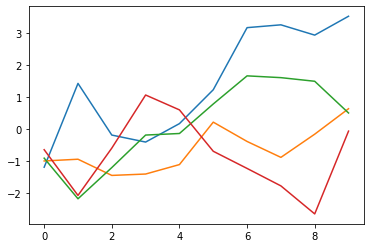

In [77]:
import matplotlib.pyplot as plt
plt.plot(cs);

In [78]:
df.head(2)

,A,B,C,D
0,-1.193392,-0.998210,-0.910331,-0.646515
1,2.616247,0.054321,-1.268539,-1.427663


In [79]:
df.tail(3)

,A,B,C,D
7,0.087931,-0.496821,-0.055641,-0.544830
8,-0.321149,0.724244,-0.113266,-0.874996
9,0.589142,0.794439,-0.989838,2.584363
